## PRACTICAL ON CONCEPTS COVERED IN LECTURE 6: PROBABILITY AND STATISTICS FOR CONTINUOUS VARIABLES ##

In this practical, we are using the Cancer_data to answer key questions pertaining to probability and statistics. The dataset contains medical parameters taken to diagnose a patient as either having a malignant tumor(M) (cancerous tumor) or benign tumor(B) (non-cancerous)

In [35]:
#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [42]:
#Import Cancer dataset and call it a pandas dataframe "medical"
medical=pd.read_csv("Cancer_data.csv")
#View the dataframe
medical

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [12]:
medical.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 1. VISUALISING THE DISTRIBUTION OF A CONTINUOUS VARIABLE ##

**A. Check the datatypes of the variables**

In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#Alternatively
medical.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The dataframes has 569 samples and 33 variables. There are 31 continuous variables, one categorical variable (diagnosis) and one integer (which is the patient id)

**B. Distribution using a histogram**

**i) Histrogram of a single variable**

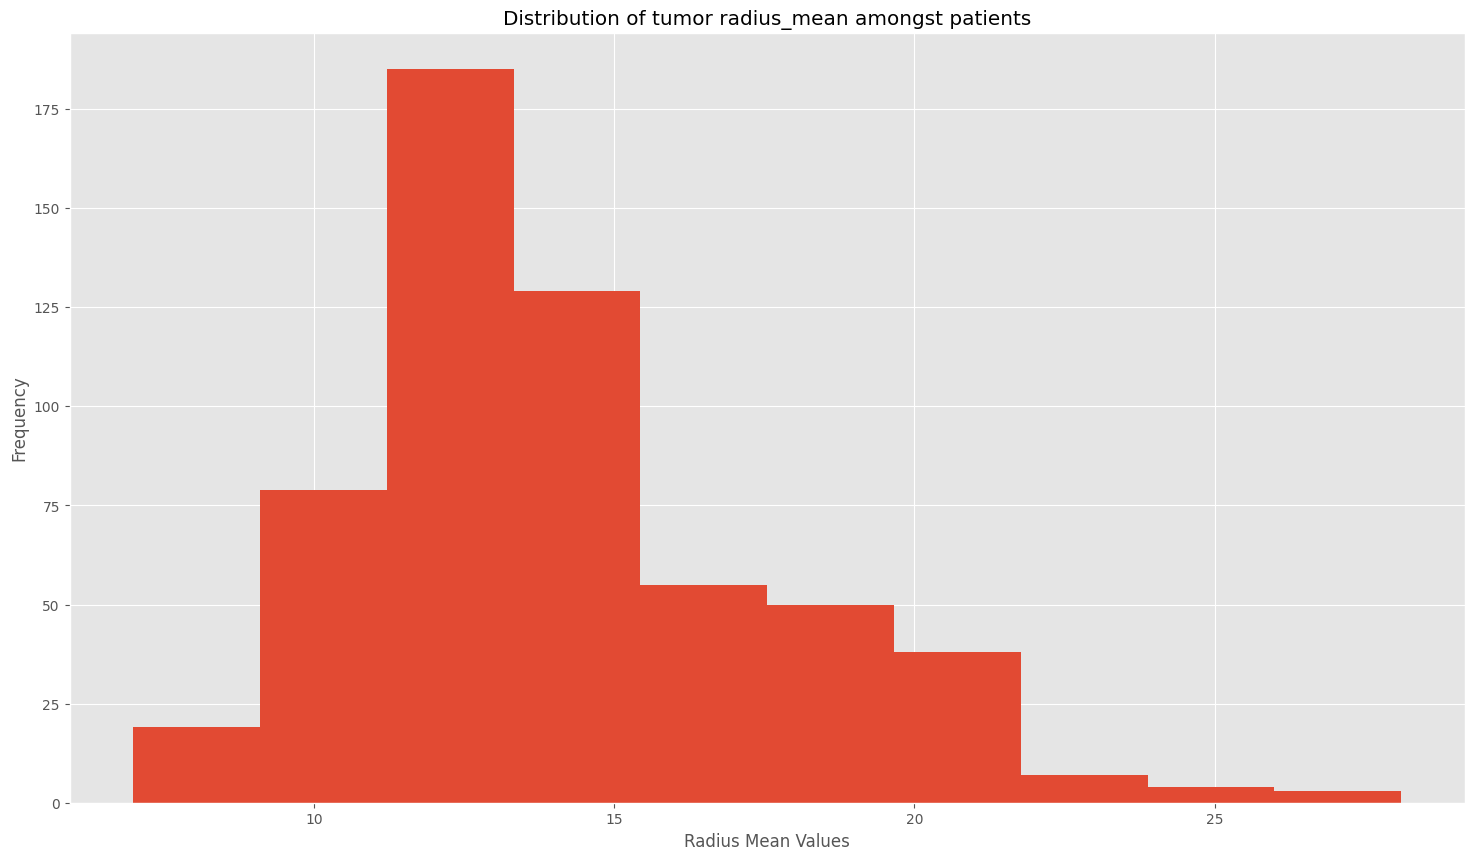

In [9]:
#Histogram of one variable (radius_mean)
medical.hist(['radius_mean'], figsize=(18,10))
#To add titles and axes names
plt.title('Distribution of tumor radius_mean amongst patients')
plt.xlabel('Radius Mean Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above histogram shows the radius mean is not normally distributed but positively skewed (implying the mean is greater than the median)

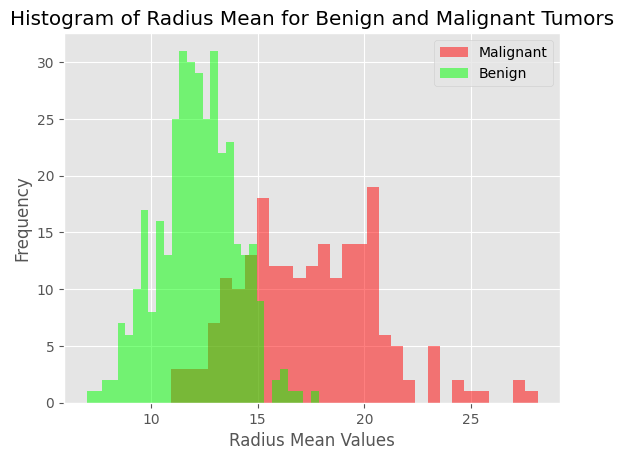

Most frequent malignant radius mean is:  20.101999999999997


In [10]:
#To view the distribution for each group of tumor (malignant versus benign)
m = plt.hist(medical[medical["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(medical[medical["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]

#To see the most frequent radius mean
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

In the above histogram, we see the radius_mean for the Malignant tumors is normally distributed but the benign tumors are not normally distributed

**ii) Histogram of multiple variables**

In [11]:
#First we define a function with codes to help generate the plots
#Plotting for one all continuous variables
import matplotlib.pyplot as plt  #library for visuals
def PlotHistograms(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Histogram of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber])

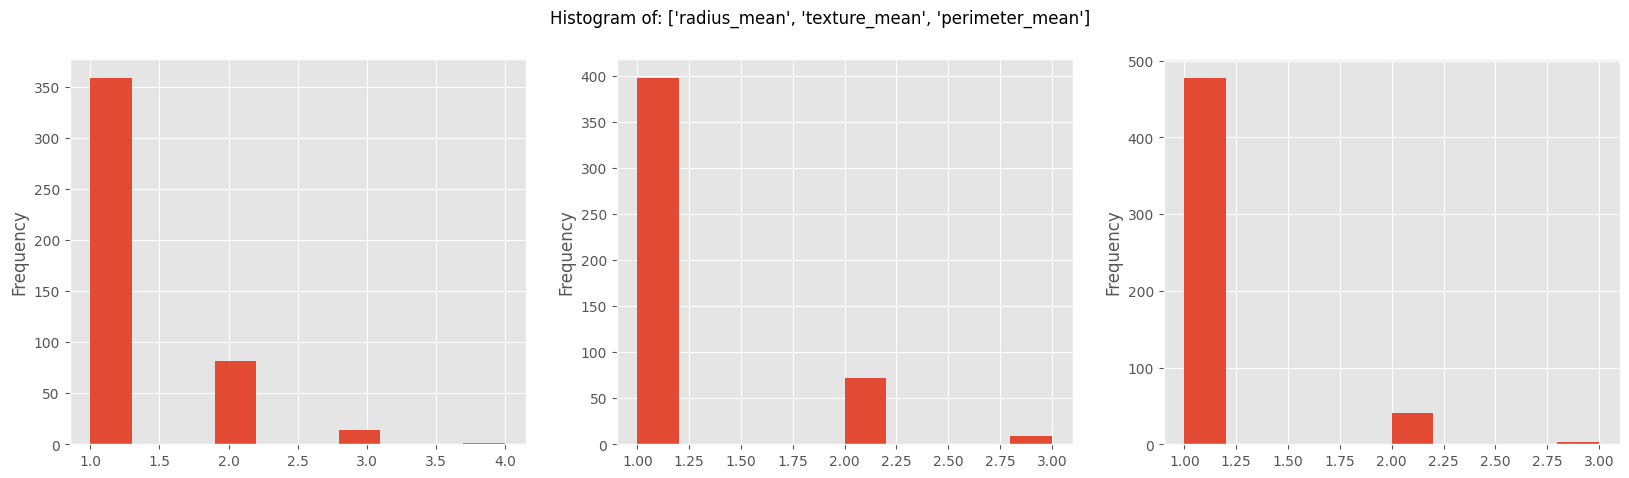

In [14]:
#Then use the above function to plot the graphs
PlotHistograms(inpData=medical, colsToPlot=['radius_mean', 'texture_mean', 'perimeter_mean'])

**C. Distribution using a Boxplot**

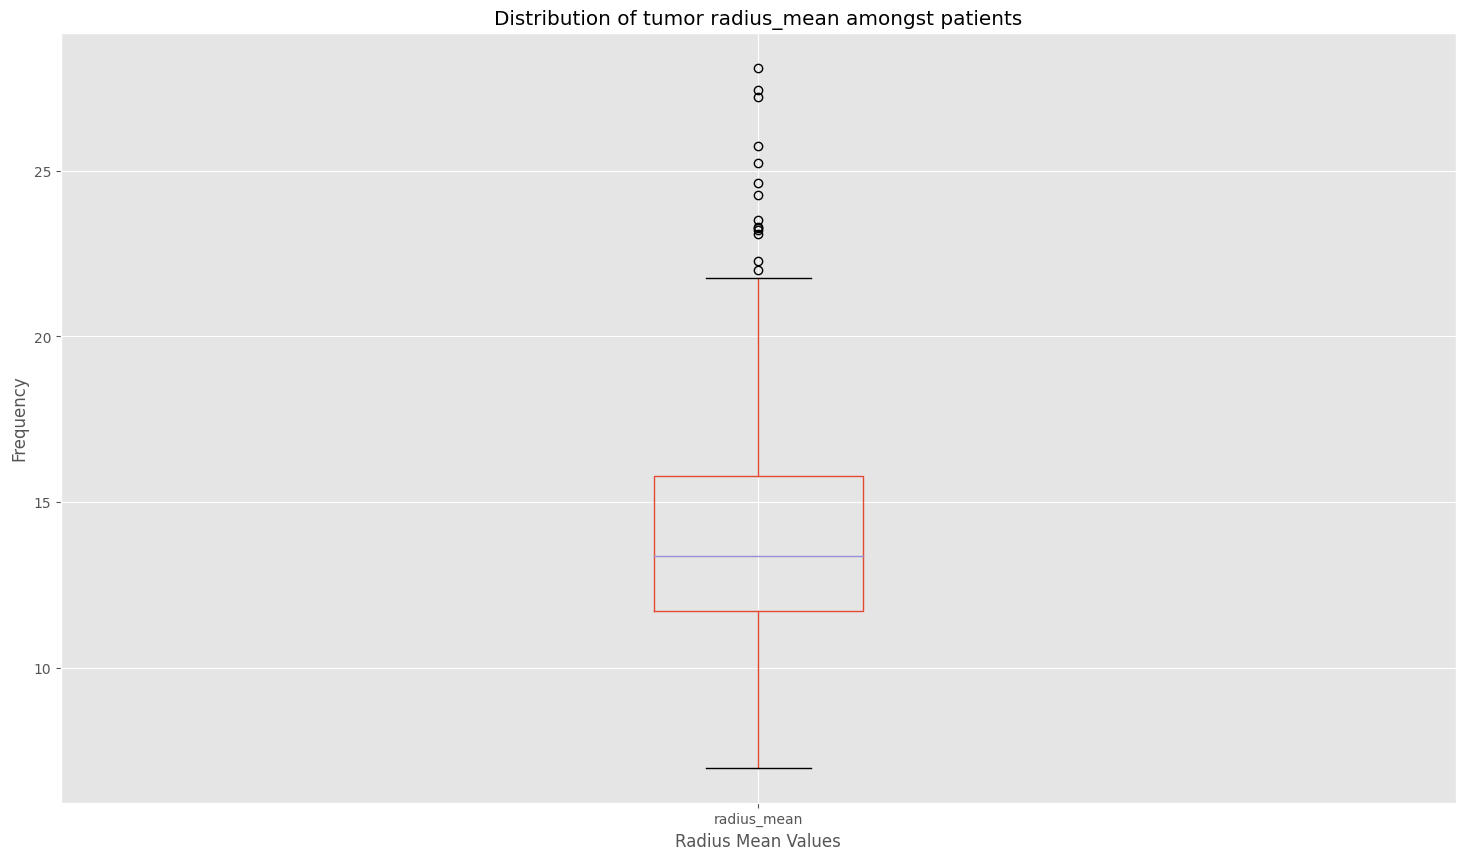

In [15]:
#Boxplot of one variable (radius_mean)
medical.boxplot(['radius_mean'], figsize=(18,10))
#To add titles and axes names
plt.title('Distribution of tumor radius_mean amongst patients')
plt.xlabel('Radius Mean Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In the above boxplot, we can clearly see the outliers 

**D. Distribution using a Q-Q plot**

In [24]:
#Libraries for a Q-Q plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

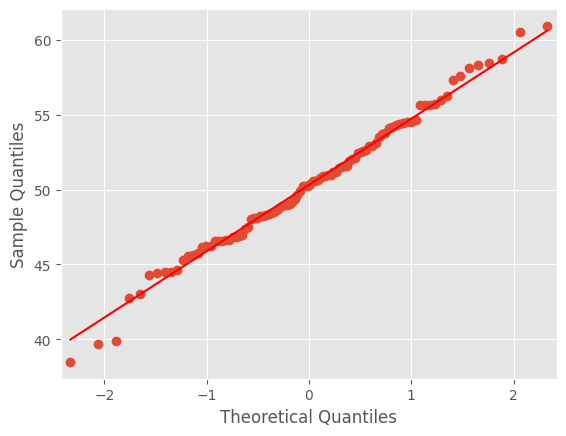

In [28]:
seed(1)
# generate univariate observations
medical = 5 * randn(100) + 50
# q-q plot
qqplot((medical), line='s')
pyplot.show()

The x-axis shows the Theoretical quantiles which is the expected normal distribution. The y-axis, shows the dataset's quantiles. Based on the plot, the red dots should align perfectly to the red line for complete normal distribution, which they don't. We see some outlier data points

## 2. STATISTICAL DISTRIBUTION OF A CONTINUOUS VARIABLE ##

**A. Using descriptive statistics
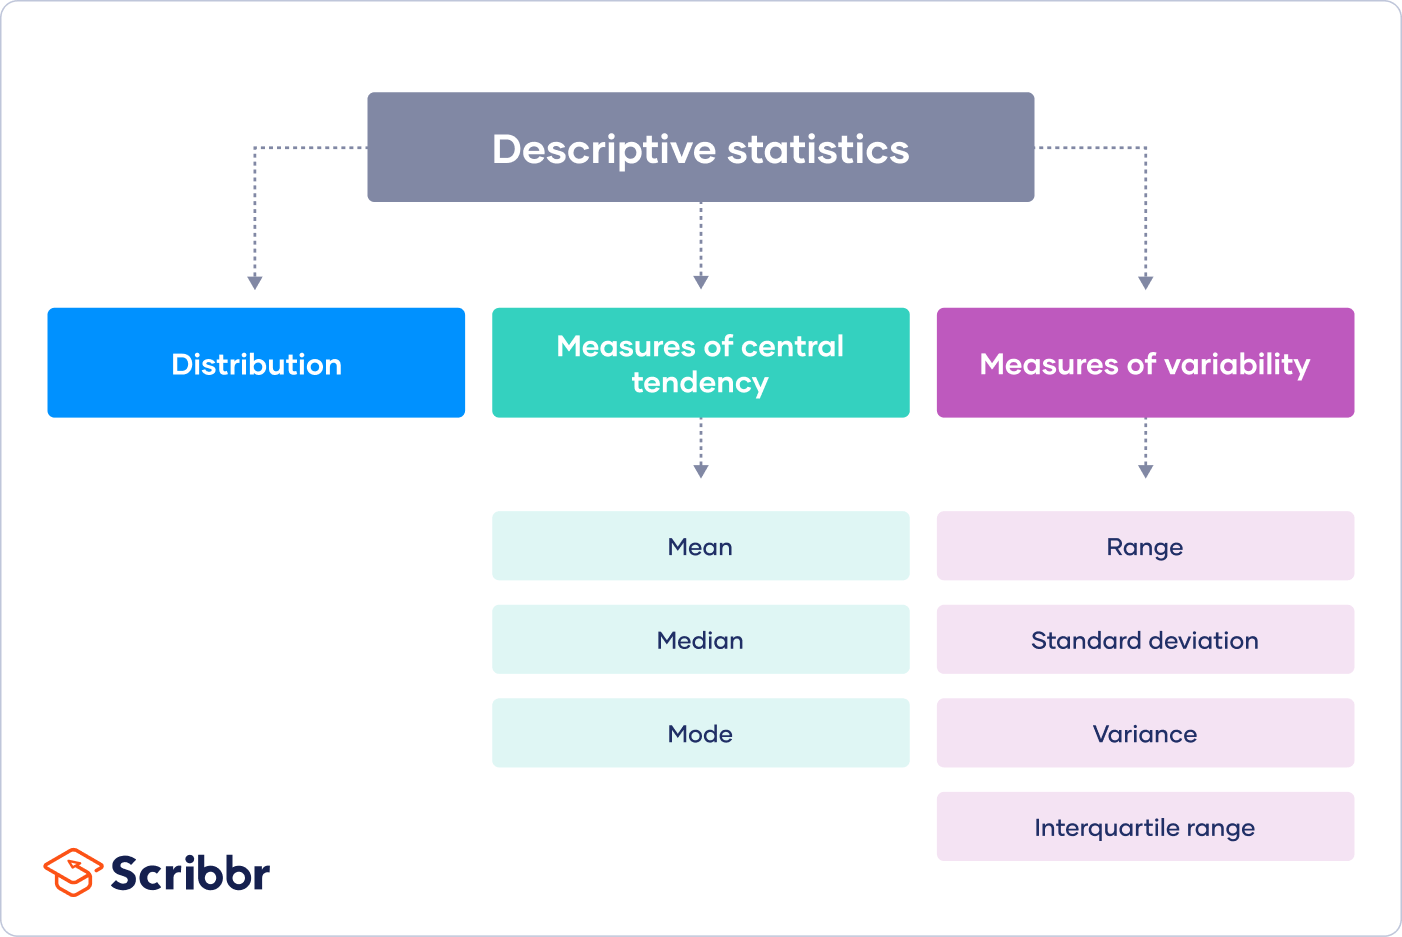**

In [43]:
medical["radius_mean"].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

Mean and median show the central tendency of the variable. std shows the variability or how spread out the data is. The standard deviation shows that each datapoint deviates 3.52 from the mean (14.12..)

**B. Using the IQR**

<a id="2"></a> <br>
## Outliers
* While looking histogram as yok can see there are rare values in benign distribution (green in graph)
* There values can be errors or rare events.
* These errors and rare events can be called outliers.
* Calculating outliers: 
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(inter quartile range) = Q3-Q1
    * finally compute Q1 - 1.5*IQR and Q3 + 1.5*IQR
    * Anything outside this range is an outlier
    * lets write the code for bening tumor distribution for feature radius mean

In [45]:
#First subset the data to separate the two diagnosis groups
data_benign = medical[medical["diagnosis"] == "B"]
data_malignant = medical[medical["diagnosis"] == "M"]

#Get the descriptive stats of radius_mean
desc = data_benign.radius_mean.describe()

#Calculate the IQR and identify outliers
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


There are 3 outlier radius_mean values (6.981 16.84  17.85)

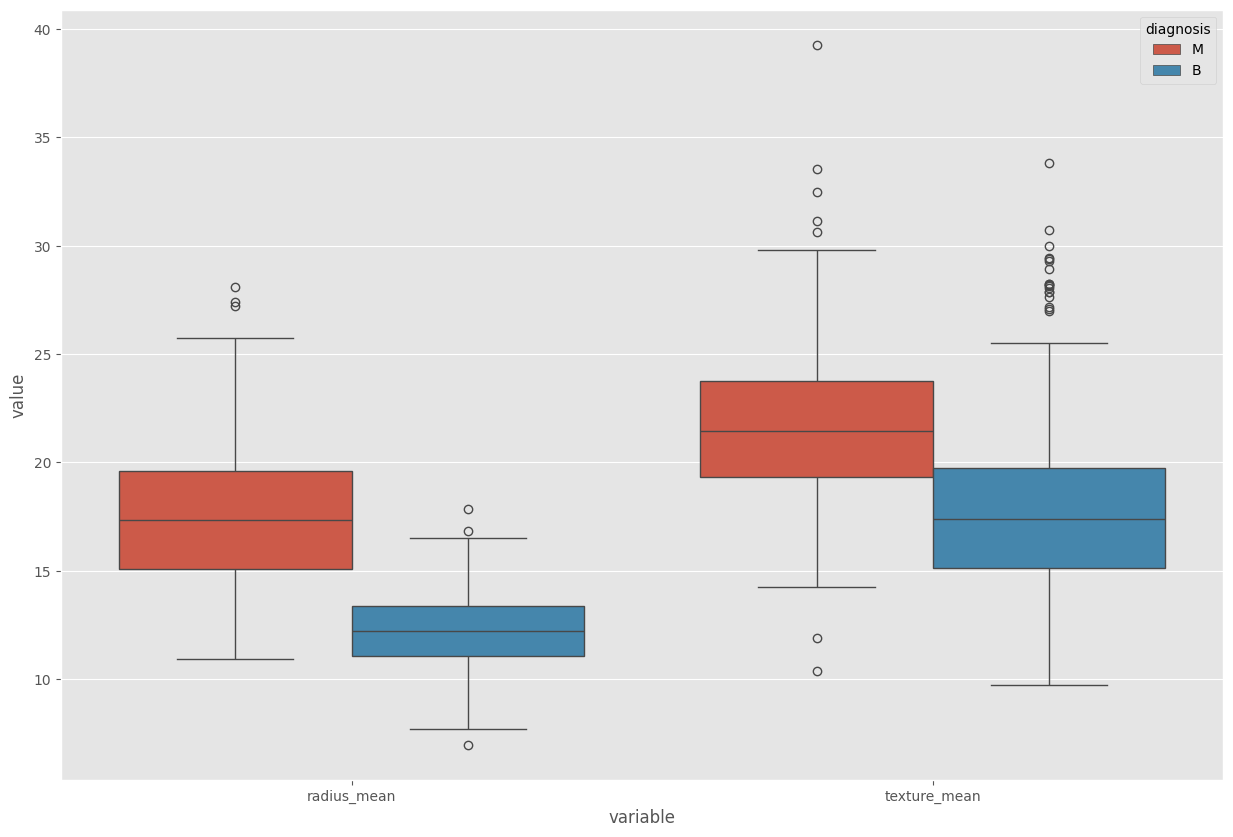

In [46]:
subset_data = pd.melt(medical,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= subset_data)
plt.show()

**C. Using Shapiro-Wilk's test**

In [44]:
from scipy.stats import shapiro
# normality test for categorical variables
stat, p = shapiro(medical['area_mean'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.858, p=0.000
Sample does not look Gaussian (reject H0)


The Shapiro-Wilk's test confirms that radius_mean is not normally distributed (Guassian)

**D. Using Effective size**

In [48]:
mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign = data_benign.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_benign)*var_benign +len(data_malignant)*var_malignant ) / float(len(data_benign)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041414


Compare size of the effect between benign radius mean and malignant radius mean = 2.204. This is a large effective size and emphasizes a big difference between the two groups of patients


## 3. PROBABILITY ESTIMATION A CONTINUOUS VARIABLE ##

**A. Marginal probability**

Looking for the probability of the radius_mean

In [56]:
## First turn the radius_mean in to discrete ranges
bins_radius = [0, 5, 10, 15, 20, 25, 30]
labels_radius = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']


## create a new column with the binned data
medical['radius_bin'] = pd.cut(medical['radius_mean'], bins = bins_radius, labels=labels_radius, right=False)

## Calculate the Marginal Probabilities
radius_probabilities = medical['radius_mean'].value_counts(normalize=True).sort_index()
radius_probabilities

radius_mean
6.981     0.001757
7.691     0.001757
7.729     0.001757
7.760     0.001757
8.196     0.001757
            ...   
25.220    0.001757
25.730    0.001757
27.220    0.001757
27.420    0.001757
28.110    0.001757
Name: proportion, Length: 456, dtype: float64

The probability of each tumor radius_mean are  the same (0.0017 or 1.7%). Let's check the distribution

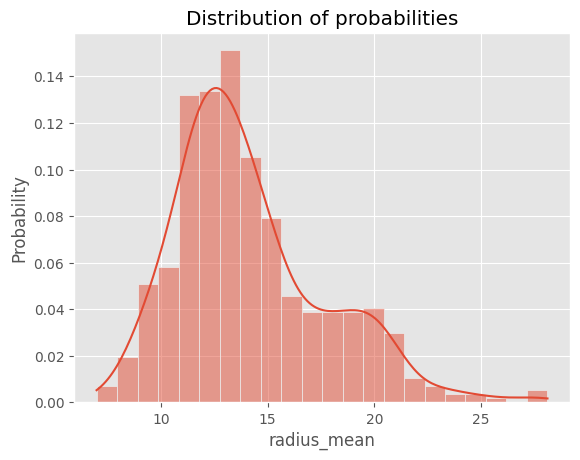

In [58]:
sns.histplot(data=medical,x='radius_mean',kde=True,stat='probability')
plt.title('Distribution of probabilities')
plt.show()

**B. Probability distribution (CDF)**

Cumulative distribution function is the probability that the continuous variable takes a value less than or equal to x

**i) Checking the distribution of the radius_mean for all groups of patients**

In [59]:
from scipy.stats import norm
#Use the mean and standard deviation of radius_mean to normalise the data
norm.cdf(600,14.127292,3.524049) #(value?,mean,standard deviation)

1.0

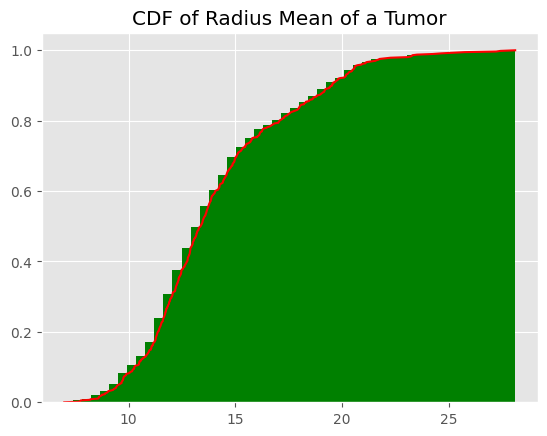

In [62]:
#Then plot the CDF
plt.hist(medical.radius_mean,bins=50,label='Radius Mean',color="green",cumulative = True,density=True, stacked=True)
sorted_data = np.sort(medical.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of Radius Mean of a Tumor')
plt.show()

According to the graph : P(12<X) ?
Answer is : about 0.13
This means the probability that the tumor has a mean radius less than or equal to 12 about 0.13.

**ii) Checking the probability distribution of radius_mean of just the Benign tumors**

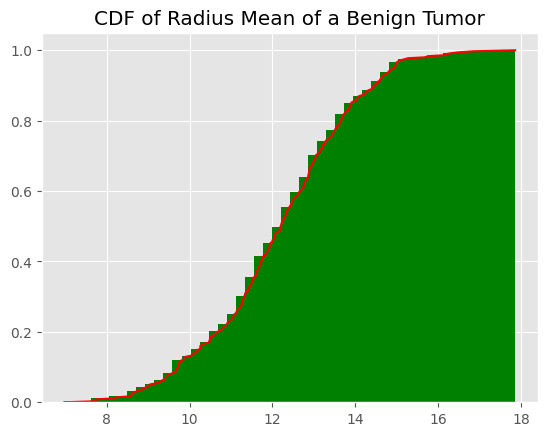

In [64]:
#Then plot the CDF
plt.hist(data_benign.radius_mean,bins=50,label='Radius Mean',color="green",cumulative = True,density=True, stacked=True)
sorted_data = np.sort(data_benign.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of Radius Mean of a Benign Tumor')
plt.show()

According to the graph, the probability that a benign tumor has a mean radius less than or equal to 12 about 0.5.

## 4. RELATIONSHIPS BETWEEN CONTINUOUS VARIABLES ##

**A. Displaying relationships visually**

**i) Using a scatterplot**

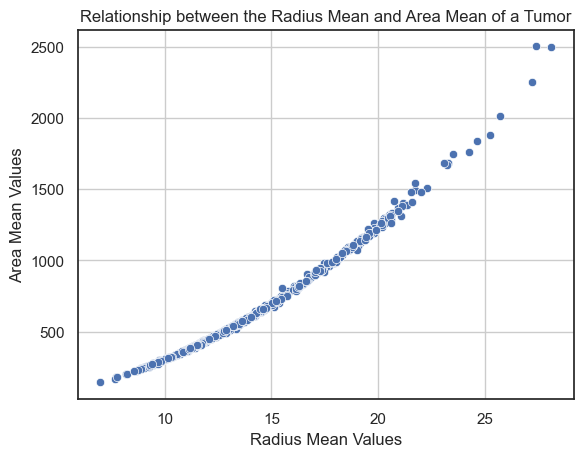

In [66]:
sns.scatterplot(x='radius_mean', y='area_mean', data=medical)
plt.title('Relationship between the Radius Mean and Area Mean of a Tumor')
plt.xlabel('Radius Mean Values')
plt.ylabel('Area Mean Values')
plt.grid(True)
plt.show()

**ii) Using a scatterplot with a kde plot**

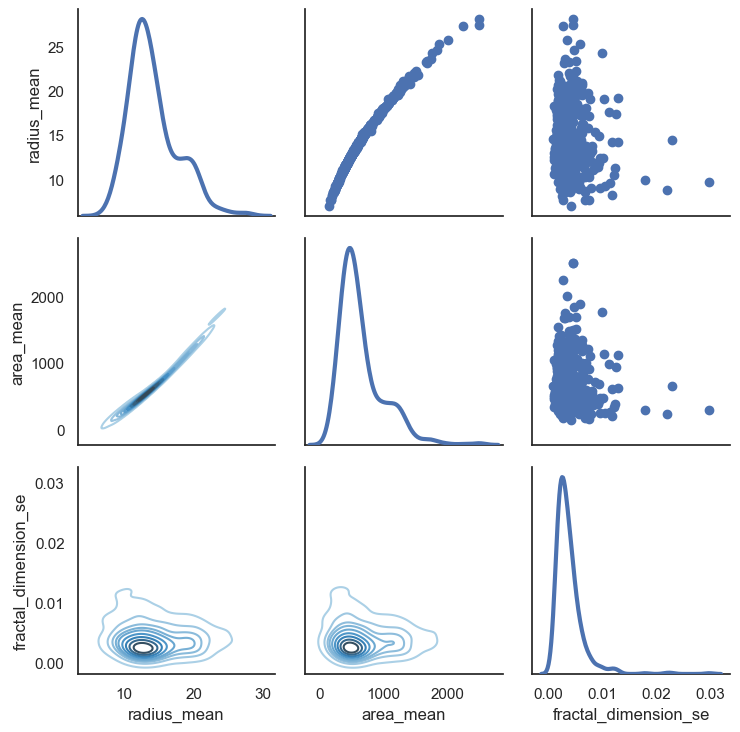

In [65]:
sns.set(style = "white")
df = medical.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

From the graphs above, there's the two variables are directly proportional (as one increases, so does the other)

**B. Testing relationships statistically**

**i) Correlation: Testing strength of a relationship**

In [76]:
#First subset the data to only have the continuous variables
ContinuousCols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [77]:
# Creating the correlation matrix
CorrelationData=medical[ContinuousCols].corr()
CorrelationData

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

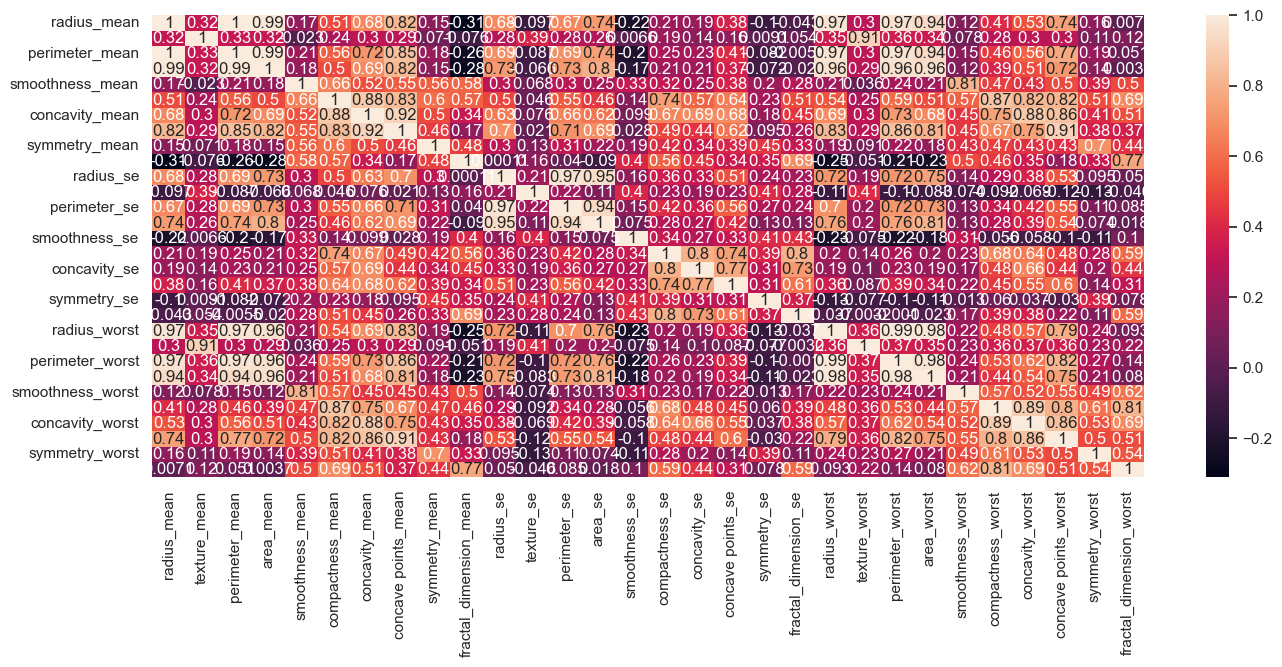

In [79]:
#The correlation matrix can also be generated as a heat matrix
plt.figure(figsize=(16,6))
sns.heatmap(medical[ContinuousCols].corr(), annot=True)

In [80]:
#Using a Pearson's correlation
ranked_data = medical.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Pearson's correlation: ")
print(spearman_corr)

Pearson's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


There's a strong positive correlation between Radius mean and area mean of a tumor

**ii) Covariation: Varying together**

In [81]:
np.cov(medical.radius_mean,medical.area_mean)
print("Covariance between radius mean and area mean: ",medical.radius_mean.cov(medical.area_mean))
print("Covariance between radius mean and fractal dimension se: ",medical.radius_mean.cov(medical.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.0003976248576440629


Radius mean and area mean of a tumor vary together.

Radius mean and fractal dimension of a tumor vary in opposite directions